In [19]:
cd C:\Users\user\Desktop\study\deep_learning

C:\Users\user\Desktop\study\deep_learning


In [244]:
import glob
import os
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [245]:
EPOCHS = 100
dataset_path = "./dataset.xlsx"

In [255]:
excel = pd.read_excel( dataset_path, "Sheet1")
df = pd.DataFrame( excel )
df.tail()

,time,user_id,category_id,product_id,"action(view=50, click=100, purchase=150, like=200, cart=250)",product_price,product_count,Unnamed: 7
9995,2020-05-12 17:30:29.995,10,1000,1222,150,21124,17,3
9996,2020-05-12 17:30:29.995,6,1003,1230,100,28377,5,2
9997,2020-05-12 17:30:29.995,19,1000,1213,250,9244,2,5
9998,2020-05-13 17:30:29.995,20,1003,1204,200,8810,20,4
9999,2020-05-14 17:30:29.995,15,1003,1226,250,14195,2,5


In [256]:
df = df.iloc[:,[2,3,4]]
df.tail()

,category_id,product_id,"action(view=50, click=100, purchase=150, like=200, cart=250)"
9995,1000,1222,150
9996,1003,1230,100
9997,1000,1213,250
9998,1003,1204,200
9999,1003,1226,250


In [257]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)
train_stats = df.describe().transpose()
train_stats = train_stats.drop(train_stats.tail(1).index)
train_stats.tail()

,count,mean,std,min,25%,50%,75%,max
category_id,10000.0,1002.7774,1.479415,1000.0,1001.0,1003.0,1004.0,1005.0
product_id,10000.0,1214.2833,7.078365,1200.0,1209.0,1214.0,1220.0,1234.0


In [258]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [259]:
train_data = train_dataset.iloc[:,[0,1]]
train_label = train_dataset.iloc[:,[-1]]
test_data = test_dataset.iloc[:,[0,1]]
test_label = test_dataset.iloc[:,[-1]]
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)

In [260]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.compat.v1.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse',
    optimizer=optimizer,
    metrics=['mae', 'mse']) # mean absolute error, mean squre error
    return model


model = build_model()
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_67 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [261]:
model.fit(normed_train_data, train_label, epochs=EPOCHS, batch_size=32)               # train

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 0s 49us/sample - loss: 19856.6842 - mae: 122.5920 - mse: 19856.6875
Epoch 2/100
8000/8000 [==============================] - 0s 25us/sample - loss: 2569.2084 - mae: 35.3992 - mse: 2569.2083
Epoch 3/100
8000/8000 [==============================] - 0s 25us/sample - loss: 1653.7516 - mae: 23.5798 - mse: 1653.7512
Epoch 4/100
8000/8000 [==============================] - 0s 25us/sample - loss: 1606.1545 - mae: 22.3193 - mse: 1606.1544
Epoch 5/100
8000/8000 [==============================] - 0s 24us/sample - loss: 1593.0576 - mae: 22.0719 - mse: 1593.0582
Epoch 6/100
8000/8000 [==============================] - 0s 25us/sample - loss: 1580.2346 - mae: 21.9892 - mse: 1580.2343
Epoch 7/100
8000/8000 [==============================] - 0s 24us/sample - loss: 1574.0753 - mae: 21.8846 - mse: 1574.0759
Epoch 8/100
8000/8000 [==============================] - 0s 24us/sample - loss: 1566.1710 - mae: 22.0021 - mse: 1566.1713

8000/8000 [==============================] - 0s 24us/sample - loss: 1415.2799 - mae: 19.8057 - mse: 1415.2804
Epoch 68/100
8000/8000 [==============================] - 0s 24us/sample - loss: 1413.8579 - mae: 19.7740 - mse: 1413.8578
Epoch 69/100
8000/8000 [==============================] - 0s 23us/sample - loss: 1410.2793 - mae: 19.7373 - mse: 1410.2792
Epoch 70/100
8000/8000 [==============================] - 0s 24us/sample - loss: 1409.2495 - mae: 19.7153 - mse: 1409.2495
Epoch 71/100
8000/8000 [==============================] - 0s 25us/sample - loss: 1409.1863 - mae: 19.6352 - mse: 1409.1864
Epoch 72/100
8000/8000 [==============================] - 0s 24us/sample - loss: 1406.2848 - mae: 19.6541 - mse: 1406.2847
Epoch 73/100
8000/8000 [==============================] - 0s 25us/sample - loss: 1405.0524 - mae: 19.5859 - mse: 1405.0526
Epoch 74/100
8000/8000 [==============================] - 0s 25us/sample - loss: 1406.1080 - mae: 19.6681 - mse: 1406.1083
Epoch 75/100
8000/8000 [=====

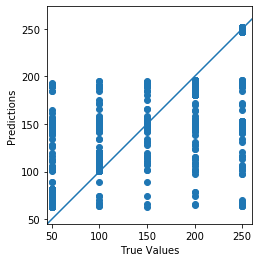

In [266]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_label, test_predictions) 
	#A scatter plot of y vs x with varying marker size and/or color.
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal') 
	#'equal'	 Set equal scaling (i.e., make circles circular) by changing axis limits.
plt.axis('square')
	#'square‘ Square plot; similar to 'scaled', but initially forcing xmax-xmin = ymax-ymin.
plt.xlim([45,plt.xlim()[1]])
plt.ylim([45,plt.ylim()[1]])
_ = plt.plot([0, 300], [0, 300])  #  ‘_’ means -> a function result is being deliberately ignored
                                                # “_ = “ is not necessary. 

In [263]:
test_predictions

array([248.94675, 148.41713, 191.8896 , ..., 190.48613, 101.73131,
       153.21887], dtype=float32)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_70 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________
Train on 989 samples
Epoch 1/100
989/989 [==============================] - 0s 246us/sample - loss: 10.5808 - mae: 3.0111 - mse: 10.5808
Epoch 2/100
989/989 [==============================] - 0s 30us/sample - loss: 6.4679 - mae: 2.2457 - mse: 6.4679
Epoch 3/100
989/989 [==============================] - 0s 31us/sample - loss: 2.5127 - mae: 1.4255 - mse: 2.5127
Epoch 4/100
989/98

989/989 [==============================] - 0s 29us/sample - loss: 0.0020 - mae: 0.0368 - mse: 0.0020
Epoch 67/100
989/989 [==============================] - 0s 28us/sample - loss: 0.0024 - mae: 0.0386 - mse: 0.0024
Epoch 68/100
989/989 [==============================] - 0s 31us/sample - loss: 0.0022 - mae: 0.0400 - mse: 0.0022
Epoch 69/100
989/989 [==============================] - 0s 28us/sample - loss: 0.0025 - mae: 0.0409 - mse: 0.0025
Epoch 70/100
989/989 [==============================] - 0s 29us/sample - loss: 0.0027 - mae: 0.0385 - mse: 0.0027
Epoch 71/100
989/989 [==============================] - 0s 29us/sample - loss: 0.0022 - mae: 0.0309 - mse: 0.0022
Epoch 72/100
989/989 [==============================] - 0s 29us/sample - loss: 0.0029 - mae: 0.0358 - mse: 0.0029 
Epoch 73/100
989/989 [==============================] - 0s 29us/sample - loss: 0.0019 - mae: 0.0333 - mse: 0.0019
Epoch 74/100
989/989 [==============================] - 0s 52us/sample - loss: 0.0020 - mae: 0.0320 

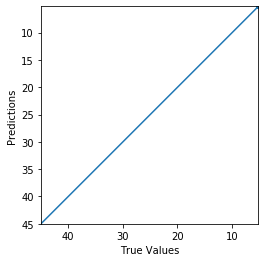

In [267]:
excel = pd.read_excel( dataset_path, "Sheet2")
df = pd.DataFrame( excel )
df = df.iloc[:,[2,3,4]]
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)
train_stats = df.describe().transpose()
train_stats = train_stats.drop(train_stats.tail(1).index)
train_data = train_dataset.iloc[:,[0,1]]
train_label = train_dataset.iloc[:,[-1]]
test_data = test_dataset.iloc[:,[0,1]]
test_label = test_dataset.iloc[:,[-1]]
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)
model = build_model()
model.summary()
model.fit(normed_train_data, train_label, epochs=EPOCHS, batch_size=32)               # train
test_predictions = model.predict(normed_test_data).flatten()


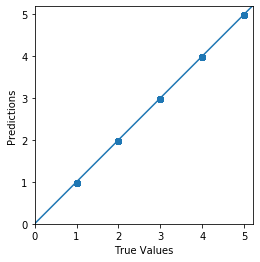

In [268]:

plt.scatter(test_label, test_predictions) 
	#A scatter plot of y vs x with varying marker size and/or color.
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal') 
	#'equal'	 Set equal scaling (i.e., make circles circular) by changing axis limits.
plt.axis('square')
	#'square‘ Square plot; similar to 'scaled', but initially forcing xmax-xmin = ymax-ymin.
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 300], [0, 300])  #  ‘_’ means -> a function result is being deliberately ignored
                                                # “_ = “ is not necessary. 